# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
print(f'X Shape is : {X.shape}')
print(f'y Shape is : {y.shape}')

X Shape is : (70000, 784)
y Shape is : (70000,)


#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [4]:
print(X[36000])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   4. 149. 255. 184.  12.   0.   0.   0.   0.   0.   0.
   0. 

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

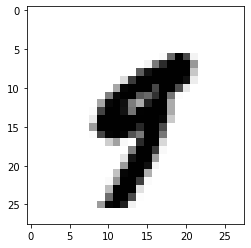

In [5]:
plt.imshow(X[36000].reshape((28,28)), cmap = plt.cm.binary, interpolation="nearest")
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [6]:
y[36000]

'9'

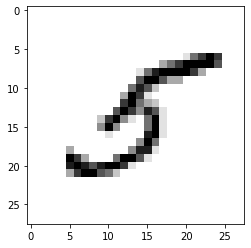

In [7]:
plt.imshow(X[35].reshape((28,28)), cmap = plt.cm.binary, interpolation="nearest")
plt.show()

In [8]:
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [9]:
X_train = X[0:60000]
X_test = X[60000:]
y_train = y[0:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [10]:
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [11]:
just_5_model = LogisticRegression().fit(X_train, y_train_5)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:
y_pred_5 = just_5_model.predict(X_train)

print(y_pred_5[36000])
print(y[36000])

0
9


In [13]:
# The y predect shows 0, because the real value is 9, not 5.

#### The 35th value is a 5. Check if it was correctly predicted.

In [14]:
print(y_pred_5[35])
print(y[35])

1
5


In [15]:
# It predicts corrected and outputs 1 because the real value is 5.

In [16]:
y_pred_5 = just_5_model.predict(X_test)

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [17]:
# Libraries
from sklearn.base import BaseEstimator

In [18]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [19]:
never_5_clf.fit(X_train)
y_no_pred_5 = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [20]:
print('For the Logistic Regression')
print(confusion_matrix(y_test_5, y_pred_5))
print(precision_score(y_test_5, y_pred_5))
print(recall_score(y_test_5, y_pred_5))
print(f1_score(y_test_5, y_pred_5))

print('\n################################\n')


print('For the Dumb classifier')
print(confusion_matrix(y_test_5, y_no_pred_5))
print(precision_score(y_test_5, y_no_pred_5))
print(recall_score(y_test_5, y_no_pred_5))
print(f1_score(y_test_5, y_no_pred_5))

For the Logistic Regression
[[9025   83]
 [ 144  748]]
0.9001203369434416
0.8385650224215246
0.8682530470110272

################################

For the Dumb classifier
[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### The logistic regression works better than the dumb classifier, we can see that from the values of the precision, recall and f1 values above, we can also see that the dumb classifier classifies everything as not 5 even the 5s. This is why the right side of the matrix is 0.

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [21]:
# For the logistic regression
fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test_5, y_pred_5)

# For the Dumb classifier
fpr_no_5, tpr_no_5, thresholds_no_5 = metrics.roc_curve(y_test_5, y_no_pred_5)

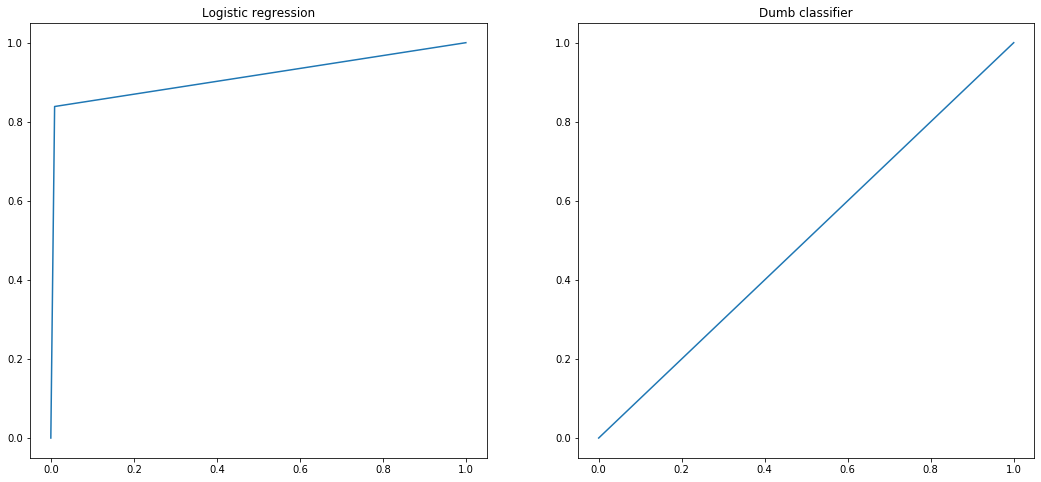

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.plot(fpr_5, tpr_5)
ax1.title.set_text('Logistic regression')

ax2.plot(fpr_no_5, fpr_no_5)
ax2.title.set_text('Dumb classifier')

plt.show()

#### Now find the roc_auc_score for each. 

In [23]:
# For the logistic regression

roc_auc_score(y_test_5, y_pred_5)

0.9147260773065023

In [24]:
# For the logistic regression

metrics.auc(fpr_5, tpr_5)

0.9147260773065023

## Means that the logistic regression algorithm has a 91.4% chance of correctly identifying each class.

In [25]:
# For the Dumb classifier

roc_auc_score(y_test_5, y_no_pred_5)

0.5

In [26]:
# For the Dumb classifier

metrics.auc(fpr_no_5, fpr_no_5)

0.5

## Means that the Dumb classifier algorithm has a 50% chance of correctly identifying each class.

#### What does this metric tell you? Which classifier works better with this metric in mind?

### From the scores and the graphs above we can clearly see that The logistic regression model works better and has higher accuracy with this metric than the dumb classifier.